In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
print(os.listdir("/gdrive/My Drive/Kidney Cancer"))

['Normal', 'Tumor']


In [4]:
DATADIR = '/gdrive/My Drive/Kidney Cancer'
CATEGORIES = ["Normal", "Tumor"]

In [5]:
IMG_SIZE = 100

In [6]:
all_data =[]

def create_all_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                all_data.append([new_array,class_num])
            except Exception as e:
                pass
create_all_data()

In [7]:
print("Toplam Görüntü Sayısı: ", len(all_data))

Toplam Görüntü Sayısı:  10000


In [8]:
X = []
y = []

for categories, label in all_data:
  X.append(categories)
  y.append(label)

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [ ]:
# %70 %30 bloğu

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)


In [11]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization
from tensorflow.keras import layers


model = Sequential()
model.add(layers.Dense(32, activation="relu",  input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(8, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100, 100, 32)      128       
                                                                 
 dense_5 (Dense)             (None, 100, 100, 16)      528       
                                                                 
 dense_6 (Dense)             (None, 100, 100, 8)       136       
                                                                 
 batch_normalization_1 (Bat  (None, 100, 100, 8)       32        
 chNormalization)                                                
                                                                 
 dense_7 (Dense)             (None, 100, 100, 2)       18        
                                                                 
 activation_1 (Activation)   (None, 100, 100, 2)       0         
                                                      

In [ ]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
]

In [ ]:
history = model.fit(x_train, train_yCl,
                    batch_size=128,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 20
                    )


Epoch 1/20
57/57 [==============================] - ETA: 0s - loss: 0.1465 - accuracy: 0.9571
Epoch 1: val_accuracy improved from -inf to 0.75750, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


57/57 [==============================] - 30s 356ms/step - loss: 0.1465 - accuracy: 0.9571 - val_loss: 1.5222 - val_accuracy: 0.7575
Epoch 2/20
57/57 [==============================] - ETA: 0s - loss: 0.0110 - accuracy: 0.9965
Epoch 2: val_accuracy did not improve from 0.75750
57/57 [==============================] - 13s 221ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.9511 - val_accuracy: 0.7538
Epoch 3/20
57/57 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9987
Epoch 3: val_accuracy improved from 0.75750 to 0.78875, saving model to model.h5
57/57 [==============================] - 19s 329ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.4938 - val_accuracy: 0.7887
Epoch 4/20
57/57 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9996
Epoch 4: val_accuracy improved from 0.78875 to 0.91000, saving model to model.h5
57/57 [==============================] - 23s 398ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.1882 

In [ ]:
score_valid = model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = model.evaluate(x_test, test_yCl)
print("Validation Accuracy: ", score_test[1])

score_train = model.evaluate(x_train, train_yCl)
print("Validation Accuracy: ", score_train[1])

25/25 [==============================] - 0s 13ms/step - loss: 0.0014 - accuracy: 1.0000
Validation Accuracy:  1.0
63/63 [==============================] - 1s 14ms/step - loss: 1.3148e-04 - accuracy: 1.0000
Validation Accuracy:  1.0
225/225 [==============================] - 3s 11ms/step - loss: 3.5146e-05 - accuracy: 1.0000
Validation Accuracy:  1.0


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

63/63 [==============================] - 1s 10ms/step
Accuracy: 0.506
Precision: 1.0
Recall: 0.506
F1-Score: 0.6719787516600265
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.51      0.67      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.51      2000
   macro avg       0.50      0.25      0.34      2000
weighted avg       1.00      0.51      0.67      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


63/63 [==============================] - 1s 9ms/step


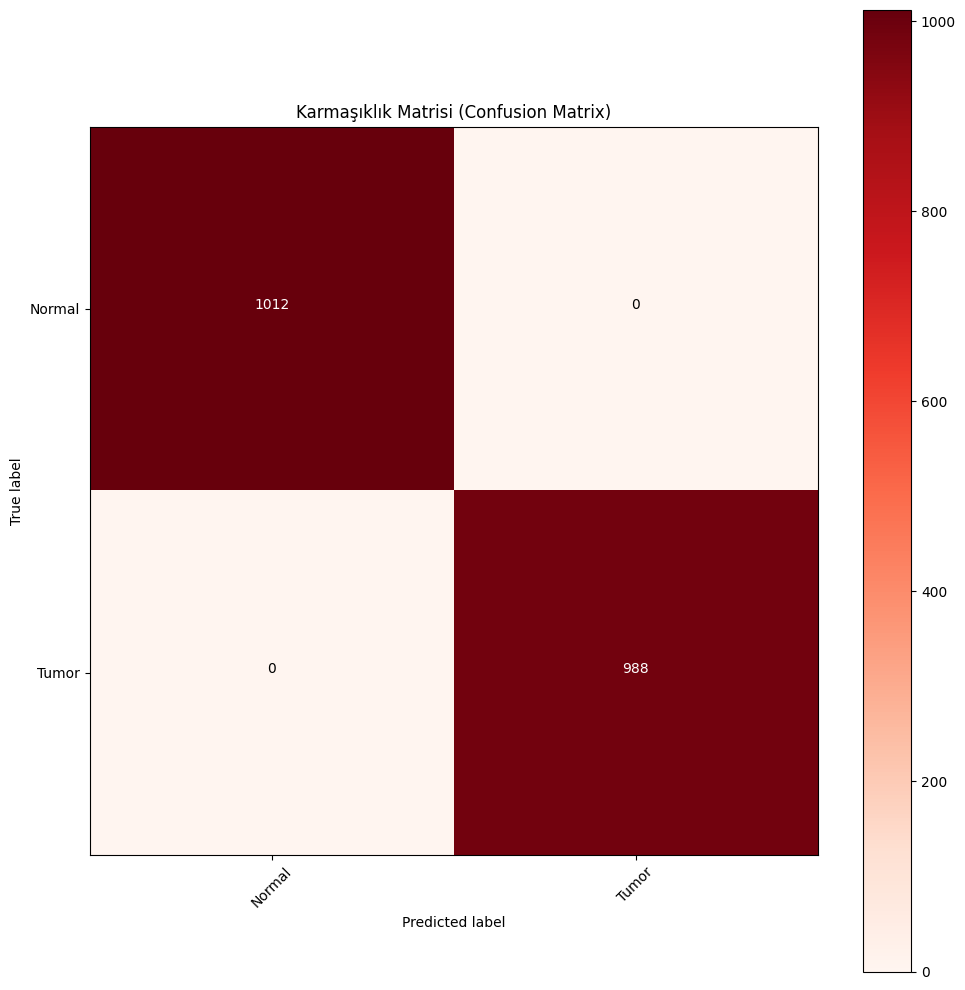

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
def evaluate_model(model, x_test, y_test):
    # Accuracy Score
    y_pred = model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test.reshape(-1, 1), axis=1)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    print(f"Accuracy: {accuracy}")

    # Precision Score
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division = 0)
    print(f"Precision: {precision}")

    # Recall Score
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division = 0)
    print(f"Recall: {recall}")

    # F1 Score
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division = 0)
    print(f"F1-Score: {f1}")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test_classes, y_pred_classes))

    # Confusion Matrix
    Y_pred = model.predict(x_test)
    y_pred_model = np.argmax(Y_pred, axis=1)
    cm_model = confusion_matrix(y_test, y_pred_model)
    plot_confusion_matrix(cm_model, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

# Modeli değerlendir
evaluate_model(model, x_test, y_test)